In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df.describe()                                         # -ve skewness in monthlycharges

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()                                            # no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.drop("customerID" ,axis=1,inplace=True)

# To use and focus only on relevant information i dropped column name customerID

In [15]:
df[df.TotalCharges == ' '].head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [16]:
df.drop(index=df[df.TotalCharges == ' '].index, axis=0, inplace=True)

# To convert "TotalCharges" column from object to float64 i drop the rows which has " " as they are not relevant for my data

In [17]:
df.TotalCharges = df.TotalCharges.astype('float')

# converted colunm "TotalCharges' into ftoat64 from object

In [57]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [19]:
df.Churn.value_counts(normalize=True)          
# It means that 73% people stay and 26% leave.

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

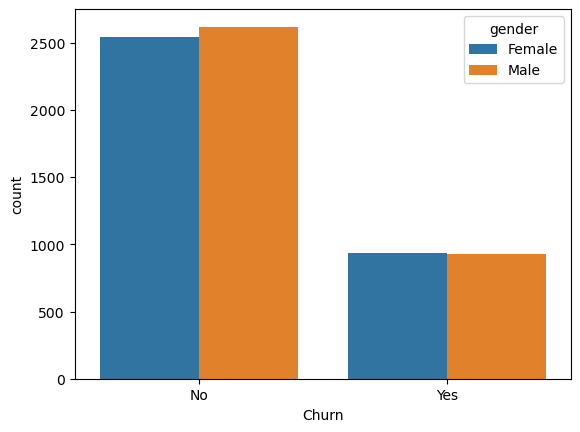

In [20]:
sns.countplot(data=df, x='Churn', hue='gender');

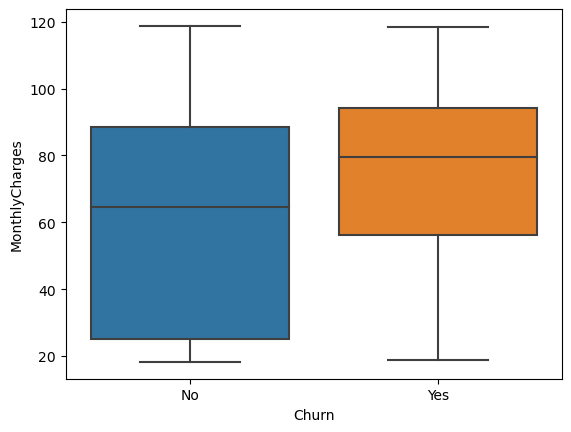

In [21]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges');

In [22]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Axes: >

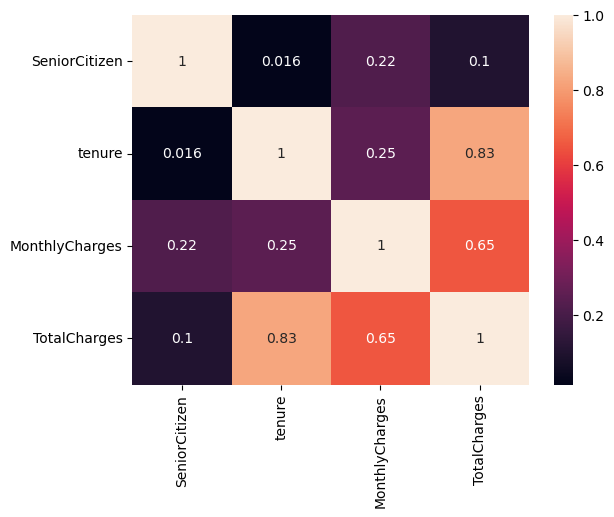

In [23]:
sns.heatmap(df.corr(),annot=True)

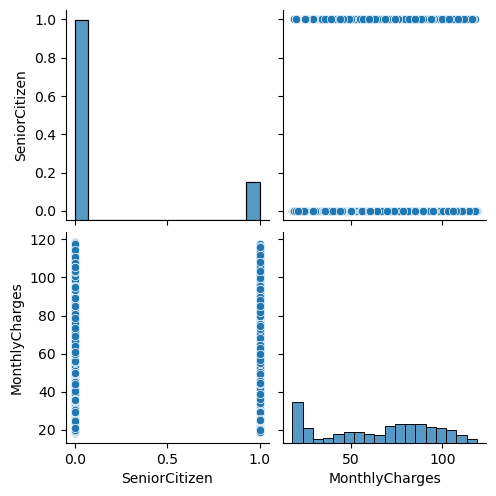

In [24]:
sns.pairplot(df[["Churn","SeniorCitizen","MonthlyCharges","PaymentMethod"]])

In [25]:
cols=df.select_dtypes(["object"]).columns
cols

# to make code easier i have put all the columns of object type into one variable
#"cols" so that i don't have to write each column again and again

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
oe.fit_transform(df[cols])

array([[0., 1., 0., ..., 1., 2., 0.],
       [1., 0., 0., ..., 0., 3., 0.],
       [1., 0., 0., ..., 1., 3., 1.],
       ...,
       [0., 1., 1., ..., 1., 2., 0.],
       [1., 1., 0., ..., 1., 3., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [27]:
df[cols]=oe.fit_transform(df[cols])


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   float64
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   float64
 3   Dependents        7032 non-null   float64
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   float64
 6   MultipleLines     7032 non-null   float64
 7   InternetService   7032 non-null   float64
 8   OnlineSecurity    7032 non-null   float64
 9   OnlineBackup      7032 non-null   float64
 10  DeviceProtection  7032 non-null   float64
 11  TechSupport       7032 non-null   float64
 12  StreamingTV       7032 non-null   float64
 13  StreamingMovies   7032 non-null   float64
 14  Contract          7032 non-null   float64
 15  PaperlessBilling  7032 non-null   float64
 16  PaymentMethod     7032 non-null   float64


In [29]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [30]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [31]:
target

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7032, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [33]:
from sklearn.linear_model import Ridge,Lasso
l2=Ridge(alpha=10)
l2.fit(xtrain,ytrain)
ypred=l2.predict(xtest)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)

print(mse,r2)

0.14081473252264987 0.26834815088546826


In [34]:
l2.score(xtrain,ytrain),l2.score(xtest,ytest)    

(0.2765671115145639, 0.26834815088546826)

In [35]:
l1=Lasso(alpha=10)
l1.fit(xtrain,ytrain)
ypred=l1.predict(xtest)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)

print(mse,r2)

0.1842580492965978 0.04262331031017741


In [36]:
for i in range(50):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    ypred=l2.predict(xtest)
    print(f"i:{i},Tr acc  :{l2.score(xtrain,ytrain)}, Te acc : {l2.score(xtest,ytest)}")

i:0,Tr acc  :0.2765742008717381, Te acc : 0.2682352684016456
i:1,Tr acc  :0.2765741256972991, Te acc : 0.26824762942580305
i:2,Tr acc  :0.27657390215658206, Te acc : 0.2682597416309237
i:3,Tr acc  :0.27657353317701083, Te acc : 0.26827160905790726
i:4,Tr acc  :0.2765730216251989, Te acc : 0.2682832356703504
i:5,Tr acc  :0.27657237030836446, Te acc : 0.2682946253562679
i:6,Tr acc  :0.27657158197570963, Te acc : 0.26830578192976917
i:7,Tr acc  :0.27657065931976255, Te acc : 0.2683167091326918
i:8,Tr acc  :0.2765696049776849, Te acc : 0.2683274106361955
i:9,Tr acc  :0.27656842153254624, Te acc : 0.2683378900423137
i:10,Tr acc  :0.2765671115145639, Te acc : 0.26834815088546826
i:11,Tr acc  :0.27656567740231197, Te acc : 0.268358196633944
i:12,Tr acc  :0.2765641216238992, Te acc : 0.26836803069132864
i:13,Tr acc  :0.27656244655811624, Te acc : 0.26837765639791533
i:14,Tr acc  :0.2765606545355538, Te acc : 0.26838707703207076
i:15,Tr acc  :0.2765587478396926, Te acc : 0.26839629581157
i:16,T

In [37]:
from sklearn.neighbors import KNeighborsRegressor
neigh= KNeighborsRegressor(n_neighbors=7)
neigh.fit(xtrain,ytrain)
ypred=neigh.predict(xtest)

In [38]:
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)

print(mse,r2)

0.16014678792625794 0.16790174282969672


In [39]:
for i in range(2,50):
    neigh= KNeighborsRegressor(n_neighbors=i)
    neigh.fit(xtrain,ytrain)
    ypred=neigh.predict(xtest)
    print(f"i:{i},Tr acc  :{neigh.score(xtrain,ytrain)}, Te acc : {neigh.score(xtest,ytest)}")
    

i:2,Tr acc  :0.6384142195957432, Te acc : -0.07092801688162398
i:3,Tr acc  :0.5179865079803194, Te acc : 0.045602081507027825
i:4,Tr acc  :0.4520602172656145, Te acc : 0.10679064109226633
i:5,Tr acc  :0.4107854160674286, Te acc : 0.14045101651942482
i:6,Tr acc  :0.3863356902562336, Te acc : 0.15382325562677046
i:7,Tr acc  :0.36900254091822315, Te acc : 0.16790174282969672
i:8,Tr acc  :0.3572517673895297, Te acc : 0.1841097974835042
i:9,Tr acc  :0.34627438565462576, Te acc : 0.18661444235057234
i:10,Tr acc  :0.3400026729655682, Te acc : 0.19351734618352479
i:11,Tr acc  :0.3353078149642229, Te acc : 0.1974906752948904
i:12,Tr acc  :0.32747743434366927, Te acc : 0.20949817719405994
i:13,Tr acc  :0.32193784914946577, Te acc : 0.20776237135155773
i:14,Tr acc  :0.3200063868342099, Te acc : 0.20822169279673886
i:15,Tr acc  :0.31736882050229165, Te acc : 0.21260120138090555
i:16,Tr acc  :0.3115712034809568, Te acc : 0.20948375197831537
i:17,Tr acc  :0.3064054973817596, Te acc : 0.2156835499797

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Acc Score : {ac}\nCM : \n{cm}\nCR : \n{cr}")

Acc Score : 0.775408670931059
CM : 
[[930 111]
 [205 161]]
CR : 
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1041
         1.0       0.59      0.44      0.50       366

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [43]:
lr.coef_

array([-3.73287483e-03,  5.35279873e-02, -1.10714223e-03, -1.88908494e-02,
       -1.49376425e-03, -1.46092502e-01,  1.52494068e-02,  5.17870307e-02,
       -3.73783684e-02, -2.16698234e-02, -1.67081012e-02, -4.10360000e-02,
        9.92590344e-04,  5.47605977e-03, -4.66230285e-02,  4.60809990e-02,
        6.02758784e-03,  6.11011988e-03, -5.64434207e-05])

In [44]:
lr.intercept_

0.20594925271639103

In [45]:
pd.DataFrame(lr.coef_,index=features.columns,columns=["coefficients_value"])

,coefficients_value
gender,-0.003733
SeniorCitizen,0.053528
Partner,-0.001107
Dependents,-0.018891
tenure,-0.001494
PhoneService,-0.146093
MultipleLines,0.015249
InternetService,0.051787
OnlineSecurity,-0.037378
OnlineBackup,-0.021670


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2_score=r2_score(ytest,ypred)

print(f"MAE : {mae}\nMAE :{mse}\nRMSE :{rmse}\nR2_SCORE : {r2_score}")

MAE : 0.3023739461106742
MAE :0.14083645804249328
RMSE :0.37528183814633675
R2_SCORE : 0.26823526840164247


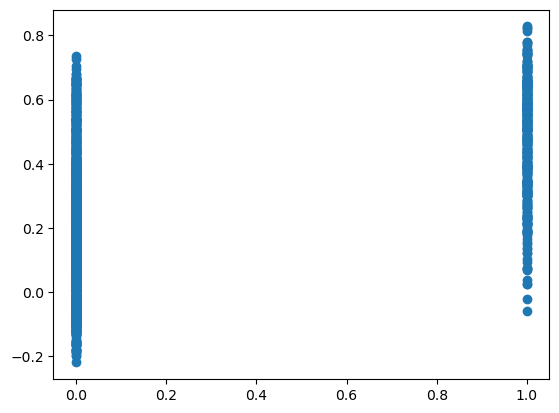

In [47]:
plt.scatter(ytest,ypred)

<Axes: xlabel='Churn', ylabel='Density'>

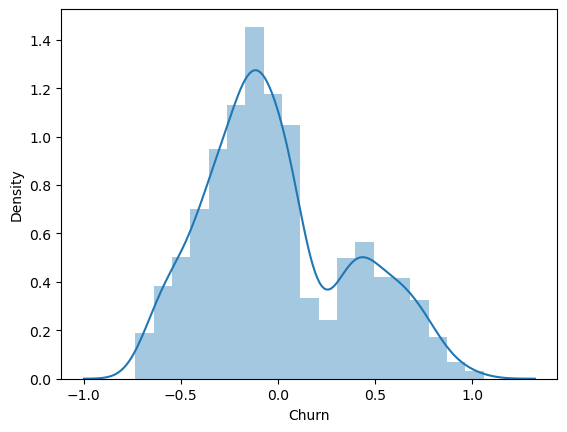

In [48]:
sns.distplot(ytest-ypred)

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)


from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"CM : \ n{cm}\nCR : \n{cr}")

CM : \ n[[930 111]
 [181 185]]
CR : 
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1041
         1.0       0.62      0.51      0.56       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [50]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print("Confusion Matrix : \n",cm)
print("Classification Report : \n",cr)

Confusion Matrix : 
 [[1041    0]
 [ 366    0]]
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1041
         1.0       0.00      0.00      0.00       366

    accuracy                           0.74      1407
   macro avg       0.37      0.50      0.43      1407
weighted avg       0.55      0.74      0.63      1407



In [51]:
print(svc.score(xtrain,ytrain))
print("Testing Score :",svc.score(xtest,ytest))

0.7328
Testing Score : 0.7398720682302772


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1041
         1.0       0.46      0.49      0.47       366

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



In [53]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1041
         1.0       0.46      0.48      0.47       366

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



In [54]:
dt.get_depth()

31

In [55]:
dt=DecisionTreeClassifier(max_depth=10,min_samples_leaf=16)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1041
         1.0       0.59      0.53      0.56       366

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=70,max_depth=15)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
cr=classification_report(ytest,ypred)

print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1041
         1.0       0.63      0.50      0.56       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407

